In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, shutil

In [14]:
original_dataset_dir = 'D:/Ajay/ML_Learning/Course_Material/datasets/dogs-vs-cats/train/train'
base_dir = 'D:/Ajay/ML_Learning/Course_Material/datasets/dogs-vs-cats/cats_and_dogs_small'
#os.mkdir(base_dir)

Directories for
the training,
validation, and
test splits

In [16]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [17]:
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [18]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

Copies the first
1,000 cat images
to train_cats_dir

In [9]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500
cat images to
validation_cats_dir

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

Copies the next 500
cat images to
test_cats_dir

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [8]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

These are just a few of the options available (for more, see the Keras documentation).
Let’s quickly go over this code:
 rotation_range is a value in degrees (0–180), a range within which to randomly
rotate pictures.
 width_shift and height_shift are ranges (as a fraction of total width or
height) within which to randomly translate pictures vertically or horizontally.
 shear_range is for randomly applying shearing transformations.
 zoom_range is for randomly zooming inside pictures.
 horizontal_flip is for randomly flipping half the images horizontally—relevant
when there are no assumptions of horizontal asymmetry (for example,
real-world pictures).
 fill_mode is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift.

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
train_generator,
steps_per_epoch=len(train_generator),
epochs=20,
validation_data=validation_generator,
validation_steps=len(validation_generator))

Epoch 1/20
63/63 [==============================] - 222s 4s/step - loss: 0.6973 - acc: 0.4950 - val_loss: 0.6880 - val_acc: 0.5280
Epoch 2/20
63/63 [==============================] - 194s 3s/step - loss: 0.6911 - acc: 0.5327 - val_loss: 0.6816 - val_acc: 0.6070
Epoch 3/20
63/63 [==============================] - 221s 4s/step - loss: 0.6886 - acc: 0.5238 - val_loss: 0.6838 - val_acc: 0.5100
Epoch 4/20
63/63 [==============================] - 194s 3s/step - loss: 0.6849 - acc: 0.5546 - val_loss: 0.6603 - val_acc: 0.6200
Epoch 5/20
63/63 [==============================] - 198s 3s/step - loss: 0.6798 - acc: 0.5699 - val_loss: 0.6567 - val_acc: 0.6010
Epoch 6/20
63/63 [==============================] - 207s 3s/step - loss: 0.6729 - acc: 0.5784 - val_loss: 0.6411 - val_acc: 0.6470
Epoch 7/20
63/63 [==============================] - 194s 3s/step - loss: 0.6681 - acc: 0.5888 - val_loss: 0.6448 - val_acc: 0.6070
Epoch 8/20
63/63 [==============================] - 191s 3s/step - loss: 0.6589 - a

In [12]:
model.save('CNN-cats_and_dogs_small_base.h5')

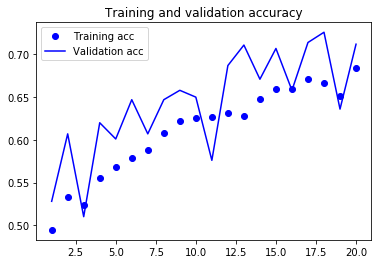

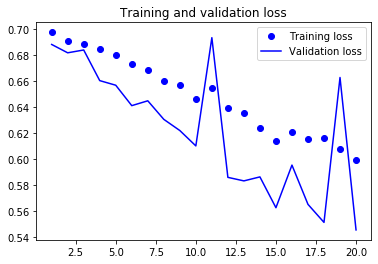

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.6940000003576279


**Using a pretrained convnet**

In [16]:
from keras.applications import VGG16
conv_base = VGG16(weights = None,
                  include_top=False,
                  input_shape=(150, 150, 3))
conv_base.load_weights('D:/Ajay/ML_Learning/Kaggle/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [21]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

**FEATURE EXTRACTION WITH DATA AUGMENTATION**

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=len(train_generator),
epochs=5,
validation_data=validation_generator,
validation_steps=len(validation_generator))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 1390s 14s/step - loss: 0.6005 - acc: 0.7015 - val_loss: 0.4995 - val_acc: 0.8110
Epoch 2/5
100/100 [==============================] - 1384s 14s/step - loss: 0.5212 - acc: 0.7580 - val_loss: 0.4245 - val_acc: 0.8270
Epoch 3/5
100/100 [==============================] - 1384s 14s/step - loss: 0.4649 - acc: 0.7910 - val_loss: 0.3893 - val_acc: 0.8320
Epoch 4/5
100/100 [==============================] - 1388s 14s/step - loss: 0.4510 - acc: 0.7925 - val_loss: 0.3644 - val_acc: 0.8420
Epoch 5/5
100/100 [==============================] - 1402s 14s/step - loss: 0.4195 - acc: 0.8115 - val_loss: 0.3627 - val_acc: 0.8440


In [27]:
model.save('CNN-cats_and_dogs_small_Transfer_Learning_VGG.h5')

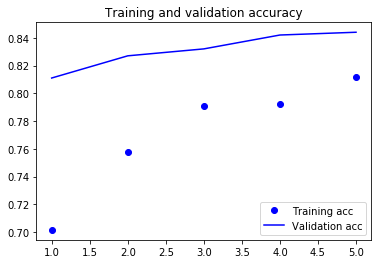

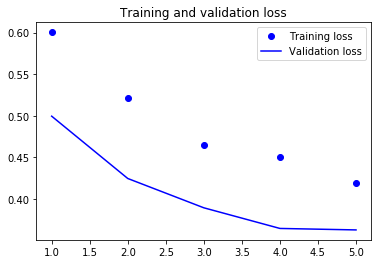

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8279999995231628


**-------Fine-tuning-----
Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning . Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers.**

Add your custom network on top of an already-trained base network.
2 Freeze the base network.
3 Train the part you added.
4 Unfreeze some layers in the base network.
5 Jointly train both these layers and the part you added.

You’ll fine-tune the last three convolutional layers, which means all layers up to
block4_pool should be frozen, and the layers block5_conv1, block5_conv2, and
block5_conv3 should be trainable.

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [31]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Inspecting and monitoring deep-learning models using Keras callbacks

A callback is an object (a class instance implementing specific methods) that is passed to
the model in the call to fit and that is called by the model at various points during
training. It has access to all the available data about the state of the model and its performance,
and it can take action: interrupt training, save a model, load a different
weight set, or otherwise alter the state of the model.
Here are some examples of ways you can use callbacks:
 Model checkpointing—Saving the current weights of the model at different points
during training.
 Early stopping—Interrupting training when the validation loss is no longer
improving (and of course, saving the best model obtained during training).
 Dynamically adjusting the value of certain parameters during training—Such as the
learning rate of the optimizer.
 Logging training and validation metrics during training, or visualizing the representations
learned by the model as


The keras.callbacks module includes a number of built-in callbacks (this is not an
exhaustive list):
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

In [35]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import keras

callbacks_list = [
keras.callbacks.EarlyStopping(
monitor='acc',
patience=1,
),
keras.callbacks.ModelCheckpoint(
filepath='my_model.h5',
monitor='val_loss',
save_best_only=True,
),
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=10
)    
]

In [36]:
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-5),
        metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=50,
callbacks=callbacks_list)

Epoch 1/2
100/100 [==============================] - 1569s 16s/step - loss: 0.3829 - acc: 0.8290 - val_loss: 0.2940 - val_acc: 0.8720
Epoch 2/2
100/100 [==============================] - 1636s 16s/step - loss: 0.3133 - acc: 0.8585 - val_loss: 0.2558 - val_acc: 0.8880


In [37]:
model.save('CNN_cats_and_dogs_small_Feeze_few_layer_VGG.h5')


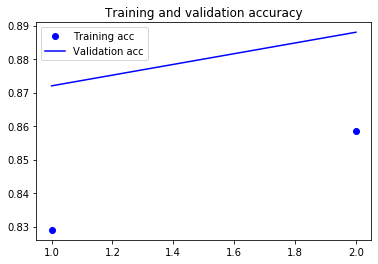

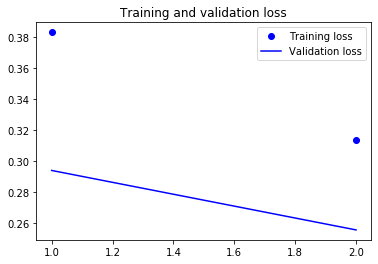

In [39]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8849999952316284


**Visualizing intermediate activations**

In [41]:
from keras.models import load_model
model = load_model('CNN-cats_and_dogs_small_base.h5')
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

**Preprocessing a single image**

In [42]:
from keras.preprocessing import image
import numpy as np

img_path = 'D:/Ajay/ML_Learning/Course_Material/datasets/dogs-vs-cats/train/train/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


**Displaying the test picture**

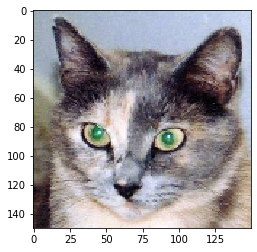

In [43]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

**Instantiating a model from an input tensor and a list of output tensors**

In [44]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

**Running the model in predict mode**

In [45]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


**Visualizing the fourth channel**

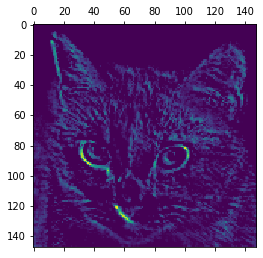

In [47]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

**Visualizing the seventh channel**

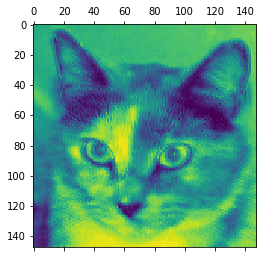

In [48]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

**Visualizing every channel in every intermediate activation**

C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


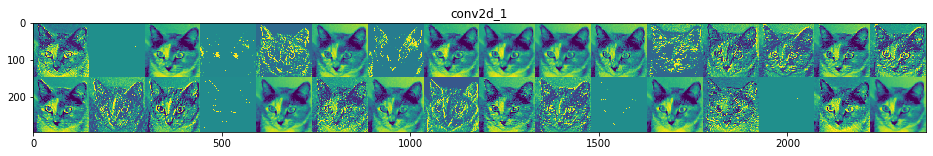

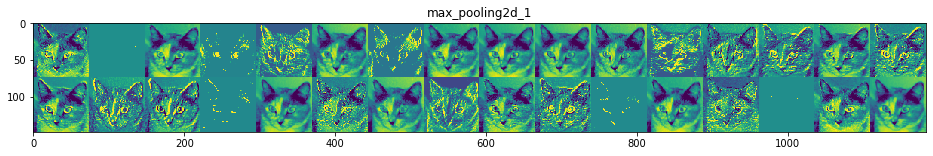

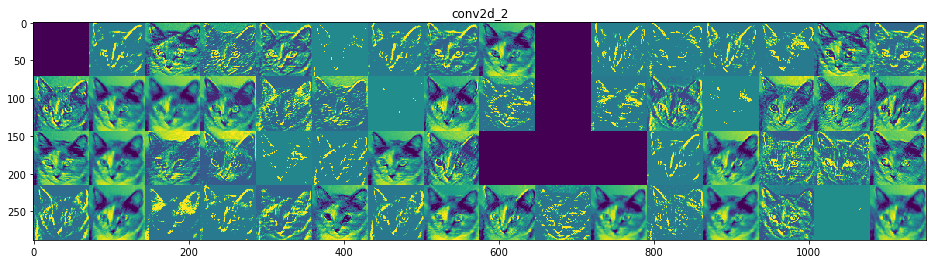

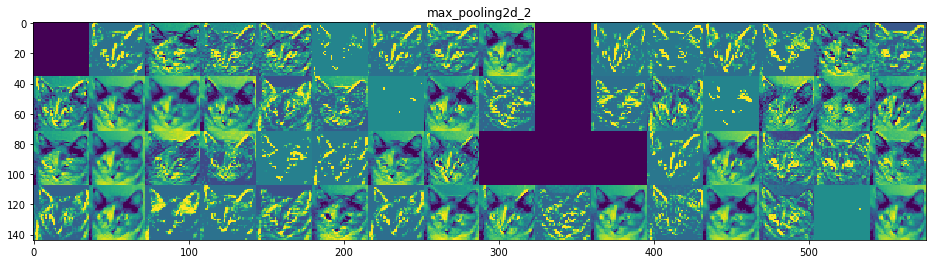

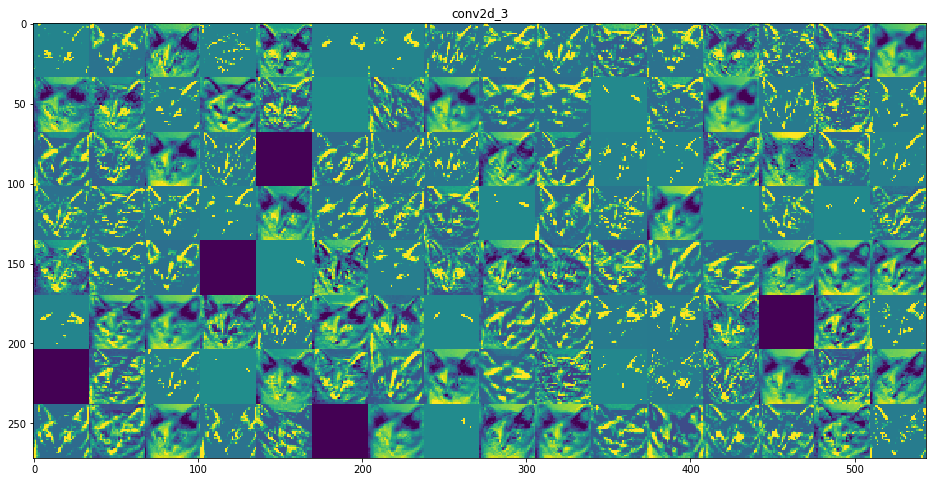

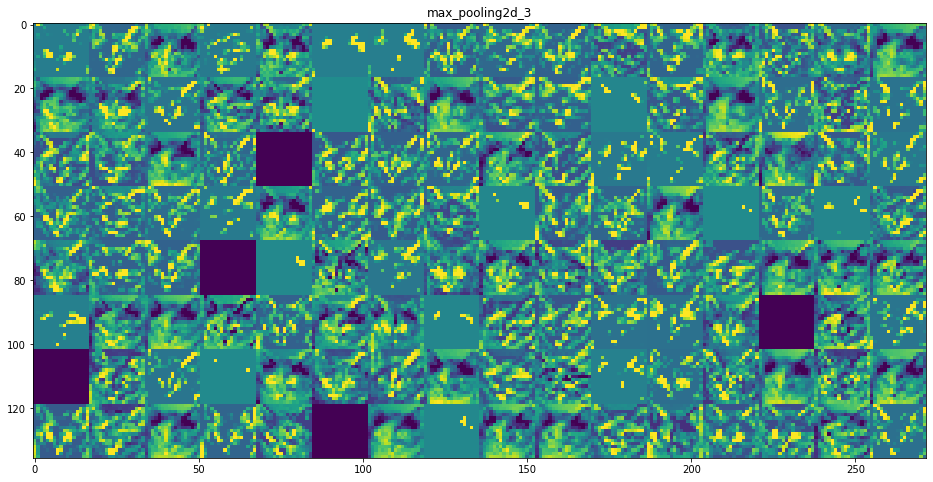

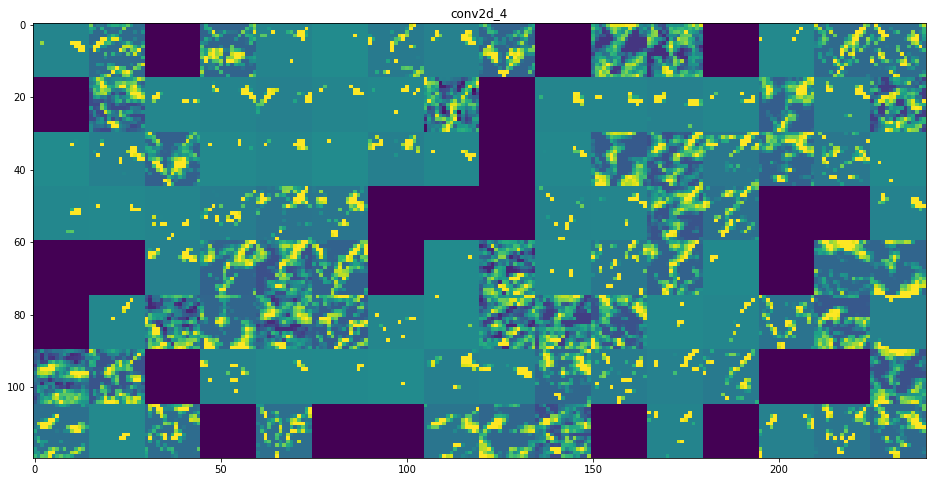

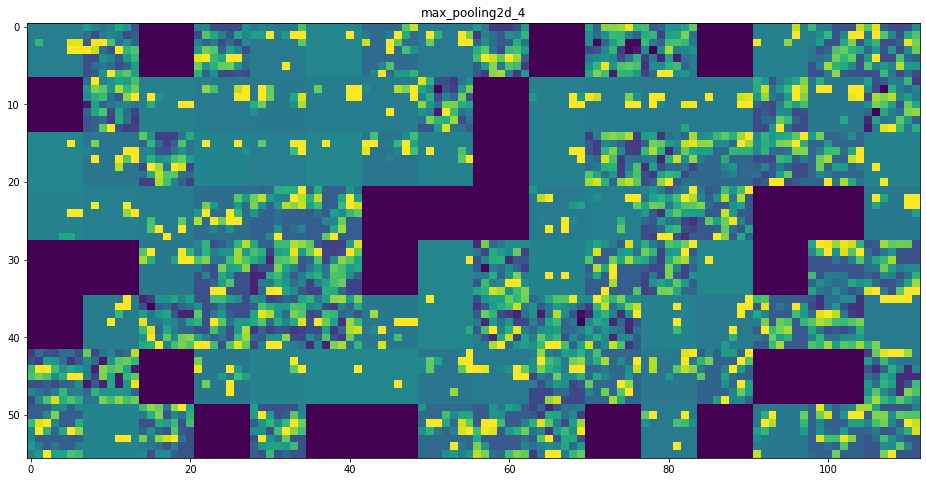

In [49]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# InceptionResnetv2

In [6]:
from keras import models
from keras import layers
from keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model_inc = InceptionResNetV2(include_top=False,
                  input_shape=(150, 150, 3),
                  weights = 'D:/Ajay/ML_Learning/Kaggle/inception_resnet_v2_weights/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5')



model_inc = models.Sequential()
model_inc.add(base_model_inc)
model_inc.add(layers.Flatten())
model_inc.add(layers.Dense(256, activation='relu'))
model_inc.add(layers.Dense(1, activation='sigmoid'))

model_inc.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [7]:
print("total trainable weights = ",len(model_inc.trainable_weights))
base_model_inc.trainable = False
print("total trainable weights after FREEZE = ",len(model_inc.trainable_weights))

total trainable weights =  492
total trainable weights after FREEZE =  4


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import keras
optimizer = keras.optimizers.Adam(lr=2e-4)

es = EarlyStopping(monitor='val_loss', mode='min', patience = 8, restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience = 3, factor = 0.5, min_lr=1e-6)
    
callback_list = [es, rlrop]

model_inc.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["acc"]) 

history = model_inc.fit_generator(generator = train_generator, 
                    steps_per_epoch = len(train_generator), 
                    epochs = 2, 
                    validation_data = validation_generator, 
                    validation_steps = len(validation_generator),
                    callbacks = callback_list)


Epoch 1/2
100/100 [==============================] - 899s 9s/step - loss: 0.5718 - acc: 0.7120 - val_loss: 0.1302 - val_acc: 0.9640
Epoch 2/2
100/100 [==============================] - 879s 9s/step - loss: 0.4572 - acc: 0.7700 - val_loss: 0.1425 - val_acc: 0.9620


In [18]:
model_inc.save('CNN_cats_and_dogs_small_InceptionResnetV2.h5')

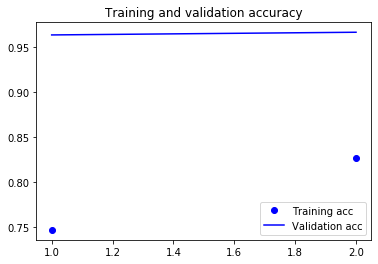

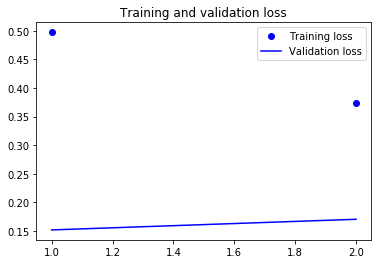

In [63]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [64]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model_inc.evaluate_generator(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9659999918937683


# Enembling-Stacking

In [1]:
from keras.models import load_model
model1 = load_model('CNN-cats_and_dogs_small_base.h5')
model1.summary() 

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
____________________________________

In [3]:
model2 = load_model('CNN-cats_and_dogs_small_Transfer_Learning_VGG.h5')
model2.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\keras\engine\saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [6]:
model3 = load_model('CNN_cats_and_dogs_small_InceptionResnetV2.h5')
#model3=model_inc
model3.summary() 



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


C:\Users\DELL\Anaconda3\envs\DL_ENV\lib\site-packages\keras\engine\saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [10]:
# Models as layers
from keras import Input
from keras import layers


first_input = Input(shape= (150, 150, 3))
second_input = Input(shape= (150, 150, 3))
third_input = Input(shape= (150, 150, 3))

first_branch=model2(first_input)
second_branch=model3(second_input)
third_branch=model1(third_input)

merged_model=layers.concatenate([first_branch,second_branch,third_branch],axis=-1)


In [13]:
from keras.models import Model

model1.name = 'test1'
model2.name = 'test2'
model3.name = 'test3'

result=layers.Dense(1, activation='sigmoid')(merged_model)
Concat_Model=Model([first_input,second_input,third_input],result)

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

train_generator2 = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

train_generator3 = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator1 = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator2 = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator3 = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
def train_gen_outputs(gen1,gen2,gen3):
    x1 = gen1[0]
    x2 = gen2[0]
    x3 = gen3[0]
    y1 = gen1[1]
    return [x1, x2, x3], y1

train_combo_gen = map(train_gen_outputs, train_generator1, train_generator2,train_generator3)

In [26]:
def valid_gen_outputs(gen1,gen2,gen3):
    x1 = gen1[0]
    x2 = gen2[0]
    x3 = gen3[0]
    y1 = gen1[1]
    return [x1, x2, x3], y1

valid_combo_gen = map(valid_gen_outputs, validation_generator1, validation_generator2,validation_generator3)

In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import keras

value_steps_per_epoch =  len(train_generator1)
value_validation_steps =  len(train_generator2)

optimizer = keras.optimizers.Adam(lr=2e-4)

es = EarlyStopping(monitor='val_loss', mode='min', patience = 8, restore_best_weights=True)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience = 3, factor = 0.5, min_lr=1e-6)
    
callback_list = [es, rlrop]

Concat_Model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["acc"]) 

history = Concat_Model.fit_generator(generator = train_combo_gen, 
                    steps_per_epoch = value_steps_per_epoch, 
                    epochs = 2, 
                    validation_data = valid_combo_gen, 
                    validation_steps = value_validation_steps,
                    callbacks = callback_list)


KeyboardInterrupt: 

In [ ]:
model_inc.save('CNN_cats_and_dogs_small_Concatenated_Model.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()